In [1]:
import random

# Parameters
num_lists = 5      # how many lists
list_length = 10   # how many numbers per list
value_range = (1, 100)  # min and max values for random integers

# Step 1: Generate the lists
random_lists = [
    [random.randint(*value_range) for _ in range(list_length)]
    for _ in range(num_lists)
]

# Print the generated lists
for i, lst in enumerate(random_lists):
    print(f"List {i}: {lst}")

# Step 2: Find which list has the largest value
max_value = float("-inf")
max_list_index = None

for i, lst in enumerate(random_lists):
    current_max = max(lst)
    if current_max > max_value:
        max_value = current_max
        max_list_index = i

print(f"\nThe largest value is {max_value}, found in List {max_list_index}.")


List 0: [62, 64, 36, 47, 21, 7, 13, 23, 94, 76]
List 1: [57, 59, 39, 16, 84, 16, 62, 32, 86, 91]
List 2: [75, 4, 33, 17, 84, 48, 8, 61, 28, 55]
List 3: [64, 29, 97, 49, 18, 94, 28, 24, 86, 32]
List 4: [25, 5, 24, 92, 17, 25, 76, 78, 3, 21]

The largest value is 97, found in List 3.


In [2]:
import random

def generate_random_subset(current_lists, subset_size):
    """
    Generate a random subset from current_lists using the same random indices
    for all lists.
    
    Args:
        current_lists (list[list]): The existing lists of values. 
                                    All lists must have the same length.
        subset_size (int): How many elements to randomly select.
    
    Returns:
        list[list]: A new list of lists with the randomly selected elements.
    """
    if not current_lists:
        return []
    
    list_length = len(current_lists[0])
    
    # Ensure all lists are the same length
    if any(len(lst) != list_length for lst in current_lists):
        raise ValueError("All lists must have the same length to use shared indices.")
    
    if subset_size > list_length:
        raise ValueError(f"Subset size {subset_size} cannot exceed list length {list_length}.")
    
    # Generate random indices ONCE
    random_indices = random.sample(range(list_length), subset_size)
    
    # Use the same indices for all lists
    new_lists = [[lst[i] for i in random_indices] for lst in current_lists]
    
    return new_lists


# -------------------------
# Example Usage
# -------------------------

# Example data
current_lists = [
    [1, 2, 3, 4, 5],
    [10, 20, 30, 40, 50],
    [7, 8, 9, 10, 11]
]

subset_size = 3
subset_lists = generate_random_subset(current_lists, subset_size)

print("Original Lists:")
for lst in current_lists:
    print(lst)

print("\nRandom Subsets (same indices used for all lists):")
for lst in subset_lists:
    print(lst)



Original Lists:
[1, 2, 3, 4, 5]
[10, 20, 30, 40, 50]
[7, 8, 9, 10, 11]

Random Subsets (same indices used for all lists):
[4, 2, 3]
[40, 20, 30]
[10, 8, 9]


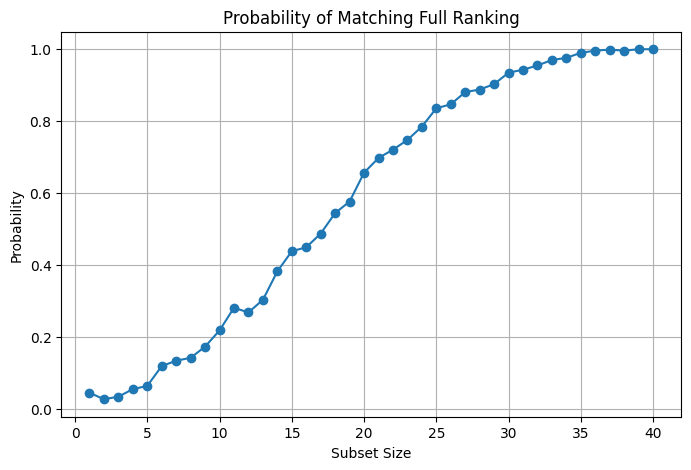

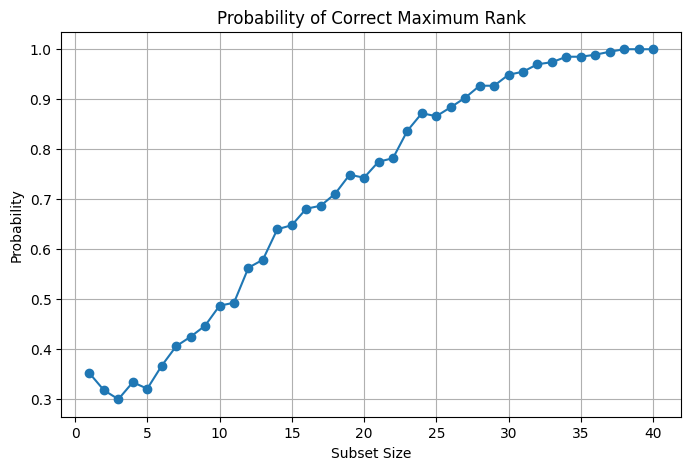

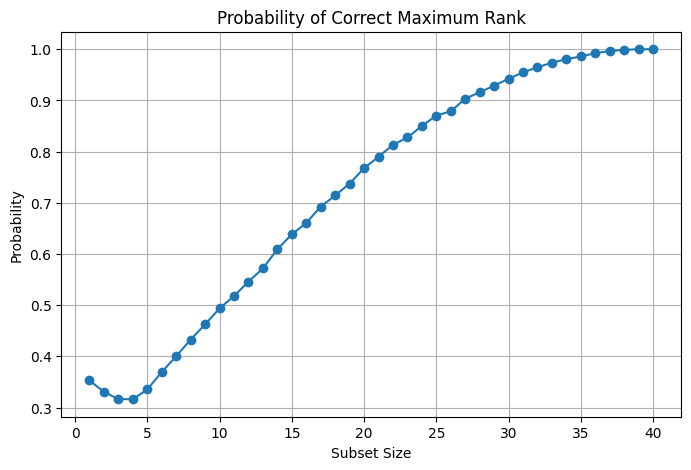

In [12]:
import random
import matplotlib.pyplot as plt

# --- Core Functions ---

def generate_random_subset(current_lists, subset_size):
    """Generate a random subset of lists using shared indices."""
    if not current_lists:
        return []
    
    list_length = len(current_lists[0])
    if any(len(lst) != list_length for lst in current_lists):
        raise ValueError("All lists must have the same length.")
    if subset_size > list_length:
        raise ValueError(f"Subset size {subset_size} cannot exceed list length {list_length}.")
    
    random_indices = random.sample(range(list_length), subset_size)
    return [[lst[i] for i in random_indices] for lst in current_lists]


def get_ranking(lists):
    """Return the ranking (indices sorted by max value, descending)."""
    max_values = [max(lst) for lst in lists]
    return sorted(range(len(max_values)), key=lambda i: max_values[i], reverse=True)

def get_top_element(lists):
    """Return the index of the list with the maximum value."""
    max_values = [max(lst) for lst in lists]
    return max_values.index(max(max_values))

def ranking_stability(current_lists, subset_size, num_trials, check_full_ranking=True):
    """
    Calculate probability that random subsets produce the same ranking as the full data.
    
    Args:
        current_lists (list[list]): Lists of values
        subset_size (int): Size of random subsets
        num_trials (int): Number of random subsets to test
        check_full_ranking (bool): If True, check entire ranking matches.
                                  If False, check only top element matches.
    
    Returns:
        float: Probability of matching ranking
    """
    if check_full_ranking:
        original_result = get_ranking(current_lists)
    else:
        original_result = get_top_element(current_lists)
    
    matches = 0
    
    for _ in range(num_trials):
        subset_lists = generate_random_subset(current_lists, subset_size)
        
        if check_full_ranking:
            subset_result = get_ranking(subset_lists)
        else:
            subset_result = get_top_element(subset_lists)
        
        if subset_result == original_result:
            matches += 1
    
    return matches / num_trials

# --- Glue Function ---

def ranking_stability_curve(current_lists, num_trials, check_full_ranking=True, 
                           subset_sizes=None, max_subset_size=None):
    """
    Compute ranking stability probabilities for specified subset sizes.
    
    Args:
        current_lists (list[list]): Lists of values (all must have same length)
        num_trials (int): Number of random subsets per size
        check_full_ranking (bool): If True, check entire ranking matches.
                                  If False, check only top element matches.
        subset_sizes (list[int], optional): Specific subset sizes to test
        max_subset_size (int, optional): Maximum subset size to test (used if subset_sizes is None)
    
    Returns:
        tuple: (subset_sizes, probabilities)
    """
    list_length = len(current_lists[0])
    
    # Determine which subset sizes to test
    if subset_sizes is not None:
        # Use provided subset sizes, but filter out invalid ones
        valid_sizes = [size for size in subset_sizes if 1 <= size <= list_length]
        if not valid_sizes:
            raise ValueError("No valid subset sizes provided")
        subset_sizes = sorted(set(valid_sizes))  # Remove duplicates and sort
    else:
        # Generate default subset sizes
        if max_subset_size is None:
            max_subset_size = list_length
        else:
            max_subset_size = min(max_subset_size, list_length)
        subset_sizes = range(1, max_subset_size + 1)
    
    probabilities = [
        ranking_stability(current_lists, subset_size, num_trials, check_full_ranking)
        for subset_size in subset_sizes
    ]
    
    return list(subset_sizes), probabilities


# --- Example Usage ---

random.seed(42)
random_lists = [
    [random.randint(1, 90) for _ in range(40)],
    [random.randint(1, 90) for _ in range(40)],
    [random.randint(1, 90) for _ in range(40)],
    [random.randint(1, 10) for _ in range(40)],
    [random.randint(1, 10) for _ in range(40)],
    [random.randint(1, 10) for _ in range(40)],
]

num_trials = 1000
subset_sizes, probabilities = ranking_stability_curve(random_lists, num_trials)
subset_sizes_partial, probabilities_partial = ranking_stability_curve(random_lists, num_trials, check_full_ranking=False)
subset_sizes_partial2, probabilities_partial2 = ranking_stability_curve(random_lists, num_trials=10000, check_full_ranking=False)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(subset_sizes, probabilities, marker='o')
plt.xlabel("Subset Size")
plt.ylabel("Probability")
plt.title("Probability of Matching Full Ranking")
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(subset_sizes_partial, probabilities_partial, marker='o')
plt.xlabel("Subset Size")
plt.ylabel("Probability")
plt.title("Probability of Correct Maximum Rank")
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(subset_sizes_partial2, probabilities_partial2, marker='o')
plt.xlabel("Subset Size")
plt.ylabel("Probability")
plt.title("Probability of Correct Maximum Rank")
plt.grid(True)
plt.show()